In [24]:
from sklearn import datasets, model_selection, ensemble
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

In [2]:
plt.style.use("dark_background")

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw.data.shape

(1140, 1850)

In [6]:
lfw.images.shape

(1140, 50, 37)

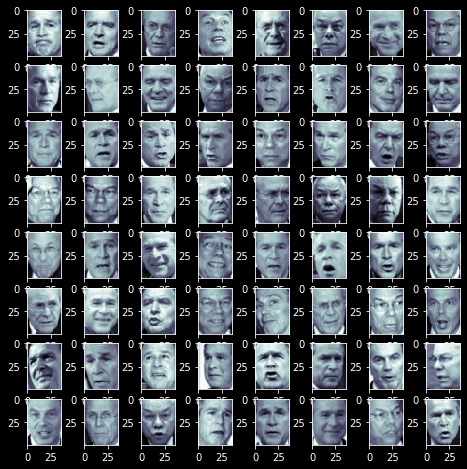

In [7]:
fig = plt.figure(figsize=(8, 8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)
plt.show()

In [15]:
x, y = lfw.data, lfw.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=0)

pca_oliv = PCA()
pca_oliv.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
k = 0
total = 0
while total<0.99:
    total += pca_oliv.explained_variance_ratio_[k]
    k += 1
k

316

In [17]:
pca_lfw = PCA(n_components=k, whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [19]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855, 50, 37))

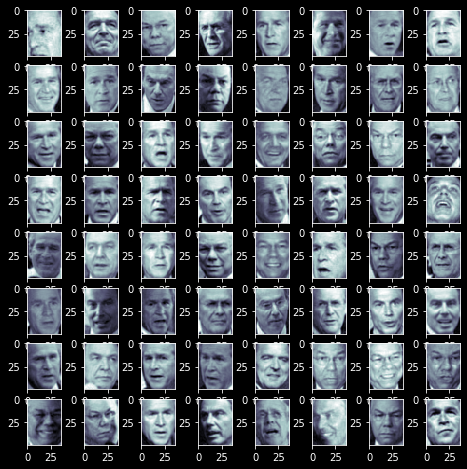

In [20]:
fig = plt.figure(figsize=(8, 8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i], cmap=plt.cm.bone)
plt.show()

In [21]:
print(pca_lfw.components_.shape)
eigenv = pca_lfw.components_.reshape((k, 50, 37))

(316, 1850)


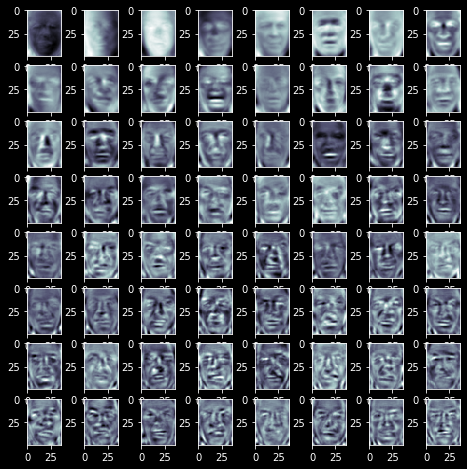

In [22]:
fig = plt.figure(figsize=(8, 8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenv[i], cmap=plt.cm.bone)
plt.show()

In [23]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [31]:
rf = ensemble.RandomForestClassifier()

start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()

In [32]:
print(f"Time Taken: {end_time - start_time}")

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Time Taken: 1.4211771488189697
              precision    recall  f1-score   support

           0       0.81      0.72      0.77        61
           1       0.90      0.25      0.39        36
           2       0.58      0.99      0.74       122
           3       1.00      0.19      0.32        31
           4       0.88      0.20      0.33        35

    accuracy                           0.66       285
   macro avg       0.83      0.47      0.51       285
weighted avg       0.75      0.66      0.60       285

[[ 44   0  17   0   0]
 [  6   9  21   0   0]
 [  1   0 121   0   0]
 [  1   1  22   6   1]
 [  2   0  26   0   7]]


In [33]:
rf = ensemble.RandomForestClassifier()

start_time = time.time()
rf.fit(x_train_pca, y_train)
end_time = time.time()

In [34]:
print(f"Time Taken: {end_time - start_time}")

y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Time Taken: 0.7951698303222656
              precision    recall  f1-score   support

           0       0.70      0.23      0.35        61
           1       0.00      0.00      0.00        36
           2       0.46      1.00      0.63       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.48       285
   macro avg       0.23      0.25      0.20       285
weighted avg       0.35      0.48      0.34       285

[[ 14   0  47   0   0]
 [  3   0  33   0   0]
 [  0   0 122   0   0]
 [  1   0  30   0   0]
 [  2   0  33   0   0]]


d:\documents\codingninjas\venv\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
